# Лабораторная работа №2 (Проведение исследований с логистической и линейной регрессией)

## 1.	Выбор начальных условий

Было сделано в [прошлой лабораторной работе](https://github.com/Jeant1k/MMTM/blob/main/lr1.ipynb)

## 2.	Создание бейзлайна и оценка качества

### a.	Обучить модели из sklearn (для логистической и линейной регрессии) для выбранных наборов данных

Импорт библиотек

In [121]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import root_mean_squared_error, accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, mean_absolute_error, r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
import numpy as np

#### Логистическая регрессия

Загрузка данных

In [53]:
titanic_path = "train.csv"
data_titanic = pd.read_csv(titanic_path)

Предобработка данных для Titanic

In [54]:
data_titanic['Survived'] = data_titanic['Survived'].fillna(0)
y_titanic = data_titanic['Survived']  # Целевая переменная
x_titanic = data_titanic.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'])

imputer = SimpleImputer(strategy='most_frequent')
x_titanic = pd.DataFrame(imputer.fit_transform(x_titanic), columns=x_titanic.columns)
x_titanic = pd.get_dummies(x_titanic, drop_first=True)

x_train_titanic, x_test_titanic, y_train_titanic, y_test_titanic = train_test_split(
    x_titanic, y_titanic, test_size=0.2, random_state=42
)

Обучение модели

In [55]:
log_reg = LogisticRegression(max_iter=500, random_state=42)
log_reg.fit(x_train_titanic, y_train_titanic)

LogisticRegression(max_iter=500, random_state=42)

#### Линейная регрессия

Загрузка данных

In [56]:
insurance_path = "insurance.csv"
data_insurance = pd.read_csv(insurance_path)

Предобработка данных для Insurance

In [57]:
y_insurance = data_insurance['charges']
x_insurance = data_insurance.drop(columns=['charges'])

x_insurance = pd.get_dummies(x_insurance, drop_first=True)

x_train_insurance, x_test_insurance, y_train_insurance, y_test_insurance = train_test_split(
    x_insurance, y_insurance, test_size=0.2, random_state=42
)

Обучение модели

In [58]:
lin_reg = LinearRegression()
lin_reg.fit(x_train_insurance, y_train_insurance)

LinearRegression()

### b.	Оценить качество моделей (для логистической и линейной регрессии) по выбранным метрикам на выбранных наборах данных

#### Логистическая регрессия

Метрики для Titanic

Accuracy: 0.82
F1 Score: 0.77
Recall: 0.74
Precision: 0.81


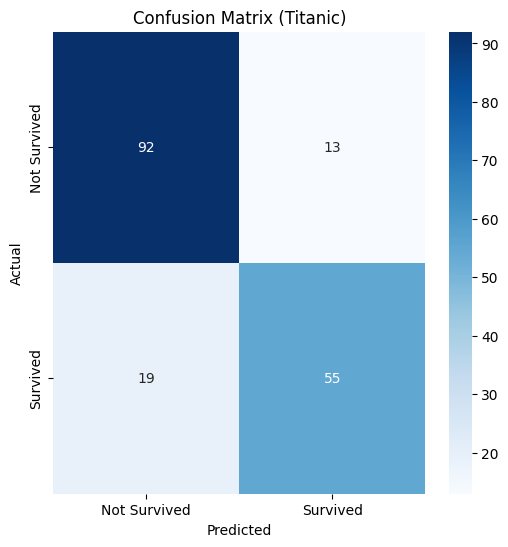

In [59]:
y_pred_titanic = log_reg.predict(x_test_titanic)
accuracy_titanic = accuracy_score(y_test_titanic, y_pred_titanic)
f1_titanic = f1_score(y_test_titanic, y_pred_titanic)
recall_titanic = recall_score(y_test_titanic, y_pred_titanic)
precision_titanic = precision_score(y_test_titanic, y_pred_titanic)

print(f"Accuracy: {accuracy_titanic:.2f}")
print(f"F1 Score: {f1_titanic:.2f}")
print(f"Recall: {recall_titanic:.2f}")
print(f"Precision: {precision_titanic:.2f}")

conf_matrix_titanic = confusion_matrix(y_test_titanic, y_pred_titanic)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_titanic, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix (Titanic)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Линейная регрессия

Метрики для Insurance

Mean Absolute Error (MAE): 4181.19
Root Mean Squared Error (RMSE): 5796.28
R-squared (R²): 0.78


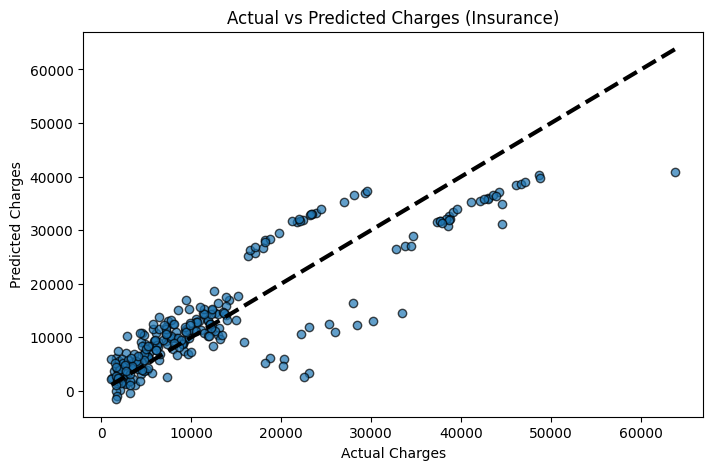

In [60]:
y_pred_insurance = lin_reg.predict(x_test_insurance)
mae_insurance = mean_absolute_error(y_test_insurance, y_pred_insurance)
mse_insurance = mean_squared_error(y_test_insurance, y_pred_insurance)
rmse_insurance = mse_insurance ** 0.5
r2_insurance = r2_score(y_test_insurance, y_pred_insurance)

print(f"Mean Absolute Error (MAE): {mae_insurance:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_insurance:.2f}")
print(f"R-squared (R²): {r2_insurance:.2f}")

plt.figure(figsize=(8, 5))
plt.scatter(y_test_insurance, y_pred_insurance, alpha=0.7, edgecolors=(0, 0, 0))
plt.plot([y_test_insurance.min(), y_test_insurance.max()],
         [y_test_insurance.min(), y_test_insurance.max()], 'k--', lw=3)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges (Insurance)')
plt.show()

## 3.	Улучшение бейзлайна

### a.	Сформулировать гипотезы (препроцессинг данных, визуализация данных, формирование новых признаков, подбор гиперпараметров на кросс-валидации и т.д.)

#### Логистическая регрессия и линейная регрессия:  
1. Улучшение предобработки данных
2. Формирование новых признаков
4. Подбор гиперпараметров

### b.	Проверить гипотезы

#### Логистическая регрессия

Масштабирование данных



In [61]:
scaler_titanic = StandardScaler()
x_train_titanic_scaled = scaler_titanic.fit_transform(x_train_titanic)
x_test_titanic_scaled = scaler_titanic.transform(x_test_titanic)

Повторное обучение модели

In [62]:
log_reg = LogisticRegression(max_iter=500, random_state=42)
log_reg.fit(x_train_titanic_scaled, y_train_titanic)

LogisticRegression(max_iter=500, random_state=42)

Метрики для Titanic

Accuracy: 0.78
F1 Score: 0.71
Recall: 0.66
Precision: 0.77


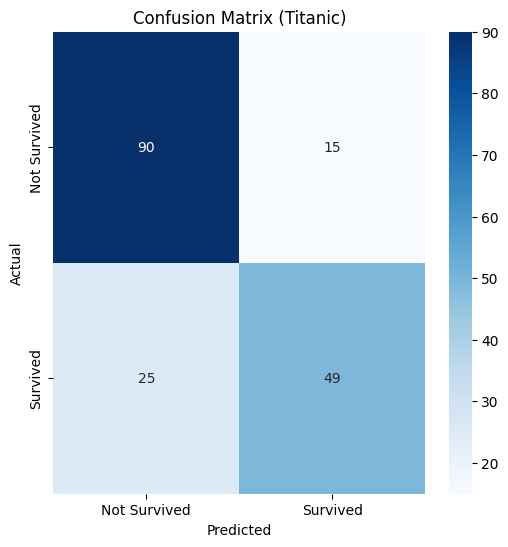

In [63]:
y_pred_titanic = log_reg.predict(x_test_titanic_scaled)
accuracy_titanic_scaled = accuracy_score(y_test_titanic, y_pred_titanic)
f1_titanic_scaled = f1_score(y_test_titanic, y_pred_titanic)
recall_titanic_scaled = recall_score(y_test_titanic, y_pred_titanic)
precision_titanic_scaled = precision_score(y_test_titanic, y_pred_titanic)

print(f"Accuracy: {accuracy_titanic_scaled:.2f}")
print(f"F1 Score: {f1_titanic_scaled:.2f}")
print(f"Recall: {recall_titanic_scaled:.2f}")
print(f"Precision: {precision_titanic_scaled:.2f}")

conf_matrix_titanic = confusion_matrix(y_test_titanic, y_pred_titanic)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_titanic, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix (Titanic)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Сравнение с бейзлайном

In [64]:
print(f"Разница в Accuracy: {accuracy_titanic_scaled - accuracy_titanic:.2f}")
print(f"Разница в F1 Score: {f1_titanic_scaled - f1_titanic:.2f}")
print(f"Разница в Recall: {recall_titanic_scaled - recall_titanic:.2f}")
print(f"Разница в Precision: {precision_titanic_scaled - precision_titanic:.2f}")

Разница в Accuracy: -0.04
Разница в F1 Score: -0.06
Разница в Recall: -0.08
Разница в Precision: -0.04


Создание новых признаков

In [66]:
data_titanic['Survived'] = data_titanic['Survived'].fillna(0)
y_titanic = data_titanic['Survived']  # Целевая переменная
x_titanic = data_titanic.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'])

x_titanic['FamilySize'] = x_titanic['SibSp'] + x_titanic['Parch']
x_titanic['IsAlone'] = (x_titanic['FamilySize'] == 0).astype(int)

imputer = SimpleImputer(strategy='most_frequent')
x_titanic = pd.DataFrame(imputer.fit_transform(x_titanic), columns=x_titanic.columns)
x_titanic = pd.get_dummies(x_titanic, drop_first=True)

x_train_titanic_new_feature, x_test_titanic_new_feature, y_train_titanic, y_test_titanic = train_test_split(
    x_titanic, y_titanic, test_size=0.2, random_state=42
)

Повторное обучение модели

In [67]:
log_reg = LogisticRegression(max_iter=500, random_state=42)
log_reg.fit(x_train_titanic_new_feature, y_train_titanic)

LogisticRegression(max_iter=500, random_state=42)

Метрики для Titanic

Accuracy: 0.83
F1 Score: 0.78
Recall: 0.74
Precision: 0.82


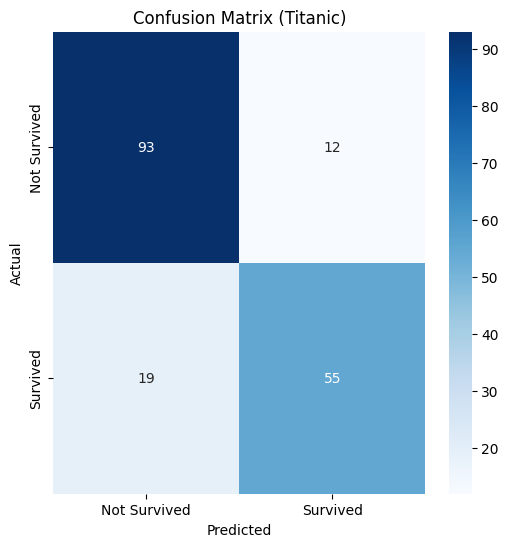

In [68]:
y_pred_titanic = log_reg.predict(x_test_titanic_new_feature)
accuracy_titanic_new_feature = accuracy_score(y_test_titanic, y_pred_titanic)
f1_titanic_new_feature = f1_score(y_test_titanic, y_pred_titanic)
recall_titanic_new_feature = recall_score(y_test_titanic, y_pred_titanic)
precision_titanic_new_feature = precision_score(y_test_titanic, y_pred_titanic)

print(f"Accuracy: {accuracy_titanic_new_feature:.2f}")
print(f"F1 Score: {f1_titanic_new_feature:.2f}")
print(f"Recall: {recall_titanic_new_feature:.2f}")
print(f"Precision: {precision_titanic_new_feature:.2f}")

conf_matrix_titanic = confusion_matrix(y_test_titanic, y_pred_titanic)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_titanic, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix (Titanic)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Сравнение с бейзлайном

In [69]:
print(f"Разница в Accuracy: {accuracy_titanic_new_feature - accuracy_titanic:.2f}")
print(f"Разница в F1 Score: {f1_titanic_new_feature - f1_titanic:.2f}")
print(f"Разница в Recall: {recall_titanic_new_feature - recall_titanic:.2f}")
print(f"Разница в Precision: {precision_titanic_new_feature - precision_titanic:.2f}")

Разница в Accuracy: 0.01
Разница в F1 Score: 0.01
Разница в Recall: 0.00
Разница в Precision: 0.01


Определение сетки гиперпараметров

In [38]:
param_grid = {
    'C': [0.001, 0.1, 1, 10],
    'max_iter': [100, 500, 1000],
    'intercept_scaling': [0.001, 0.1, 1],
}

Grid Search с кросс-валидацией

In [73]:
data_titanic['Survived'] = data_titanic['Survived'].fillna(0)
y_titanic = data_titanic['Survived']  # Целевая переменная
x_titanic = data_titanic.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'])

imputer = SimpleImputer(strategy='most_frequent')
x_titanic = pd.DataFrame(imputer.fit_transform(x_titanic), columns=x_titanic.columns)
x_titanic = pd.get_dummies(x_titanic, drop_first=True)

x_train_titanic_best, x_test_titanic_best, y_train_titanic, y_test_titanic = train_test_split(
    x_titanic, y_titanic, test_size=0.2, random_state=42
)

grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_titanic_best, y_train_titanic)

best_knn = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Лучшие параметры: {best_params}")
print(f"Лучшая кросс-валидация: {best_score:.2f}")

Лучшие параметры: {'C': 0.1, 'intercept_scaling': 0.001, 'max_iter': 100}
Лучшая кросс-валидация: 0.80


Повторное обучение модели

In [75]:
log_reg = LogisticRegression(max_iter=100, random_state=42, C=0.1, intercept_scaling=0.001)
log_reg.fit(x_train_titanic_best, y_train_titanic)

LogisticRegression(C=0.1, intercept_scaling=0.001, random_state=42)

Метрики для Titanic

Accuracy: 0.80
F1 Score: 0.75
Recall: 0.70
Precision: 0.80


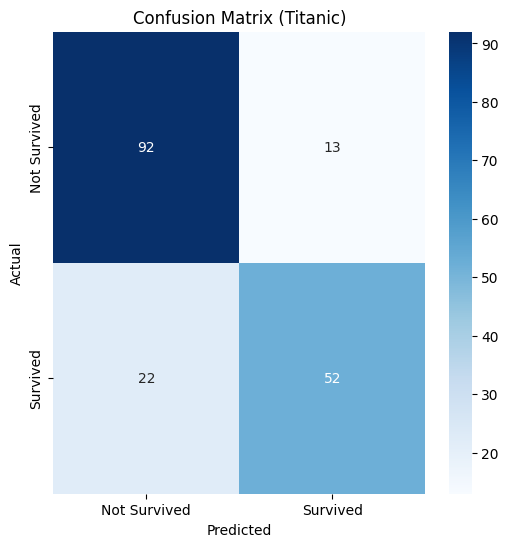

In [76]:
y_pred_titanic = log_reg.predict(x_test_titanic_best)
accuracy_titanic_best = accuracy_score(y_test_titanic, y_pred_titanic)
f1_titanic_best = f1_score(y_test_titanic, y_pred_titanic)
recall_titanic_best = recall_score(y_test_titanic, y_pred_titanic)
precision_titanic_best = precision_score(y_test_titanic, y_pred_titanic)

print(f"Accuracy: {accuracy_titanic_best:.2f}")
print(f"F1 Score: {f1_titanic_best:.2f}")
print(f"Recall: {recall_titanic_best:.2f}")
print(f"Precision: {precision_titanic_best:.2f}")

conf_matrix_titanic = confusion_matrix(y_test_titanic, y_pred_titanic)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_titanic, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix (Titanic)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Сравнение с бейзлайном

In [77]:
print(f"Разница в Accuracy: {accuracy_titanic_best - accuracy_titanic:.2f}")
print(f"Разница в F1 Score: {f1_titanic_best - f1_titanic:.2f}")
print(f"Разница в Recall: {recall_titanic_best - recall_titanic:.2f}")
print(f"Разница в Precision: {precision_titanic_best - precision_titanic:.2f}")

Разница в Accuracy: -0.02
Разница в F1 Score: -0.03
Разница в Recall: -0.04
Разница в Precision: -0.01


#### Линейная регрессия

Масштабирование данных

In [82]:
y_insurance = data_insurance['charges']
x_insurance = data_insurance.drop(columns=['charges'])

x_insurance = pd.get_dummies(x_insurance, drop_first=True)

x_train_insurance, x_test_insurance, y_train_insurance, y_test_insurance = train_test_split(
    x_insurance, y_insurance, test_size=0.2, random_state=42
)

scaler_insurance = StandardScaler()
x_train_insurance_scaled = scaler_insurance.fit_transform(x_train_insurance)
x_test_insurance_scaled = scaler_insurance.transform(x_test_insurance)

Повторное обучение модели

In [83]:
lin_reg = LinearRegression()
lin_reg.fit(x_train_insurance_scaled, y_train_insurance)

LinearRegression()

Метрики для Insurance

Mean Absolute Error (MAE): 4181.19
Root Mean Squared Error (RMSE): 5796.28
R-squared (R²): 0.78


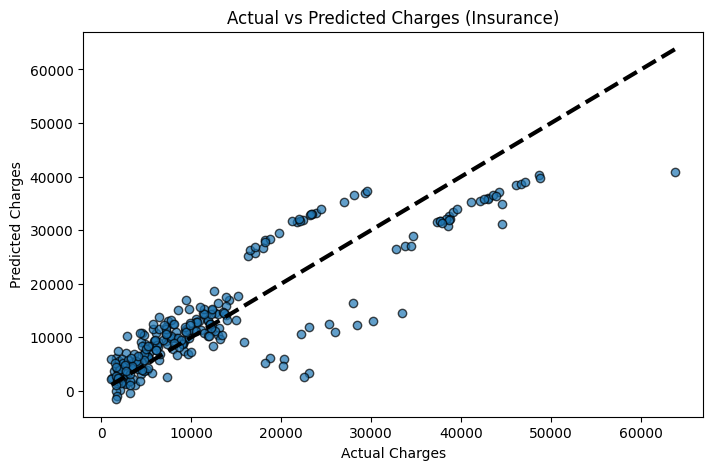

In [84]:
y_pred_insurance = lin_reg.predict(x_test_insurance_scaled)
mae_insurance_scaled = mean_absolute_error(y_test_insurance, y_pred_insurance)
mse_insurance_scaled = mean_squared_error(y_test_insurance, y_pred_insurance)
rmse_insurance_scaled = mse_insurance_scaled ** 0.5
r2_insurance_scaled = r2_score(y_test_insurance, y_pred_insurance)

print(f"Mean Absolute Error (MAE): {mae_insurance_scaled:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_insurance_scaled:.2f}")
print(f"R-squared (R²): {r2_insurance_scaled:.2f}")

plt.figure(figsize=(8, 5))
plt.scatter(y_test_insurance, y_pred_insurance, alpha=0.7, edgecolors=(0, 0, 0))
plt.plot([y_test_insurance.min(), y_test_insurance.max()],
         [y_test_insurance.min(), y_test_insurance.max()], 'k--', lw=3)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges (Insurance)')
plt.show()

Сравнение с бейзлайном

In [85]:
print(f"Разница в MAE: {mae_insurance_scaled - mae_insurance:.2f}")
print(f"Разница в RMSE: {rmse_insurance_scaled - rmse_insurance:.2f}")
print(f"Разница в R^2: {r2_insurance_scaled - r2_insurance:.2f}")

Разница в MAE: 0.00
Разница в RMSE: 0.00
Разница в R^2: -0.00


Создание новых признаков

In [86]:
y_insurance = data_insurance['charges']
x_insurance = data_insurance.drop(columns=['charges'])

x_insurance['BMI^2'] = x_insurance['bmi'] ** 2

x_insurance = pd.get_dummies(x_insurance, drop_first=True)

x_train_insurance, x_test_insurance, y_train_insurance, y_test_insurance = train_test_split(
    x_insurance, y_insurance, test_size=0.2, random_state=42
)

categorical_columns = ['sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']
numerical_columns = x_train_insurance.select_dtypes(include=['int64', 'float64']).columns.tolist()

one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False)

encoded_train = pd.DataFrame(
    one_hot_encoder.fit_transform(x_train_insurance[categorical_columns]),
    columns=one_hot_encoder.get_feature_names_out(categorical_columns),
    index=x_train_insurance.index
)

encoded_test = pd.DataFrame(
    one_hot_encoder.transform(x_test_insurance[categorical_columns]),
    columns=one_hot_encoder.get_feature_names_out(categorical_columns),
    index=x_test_insurance.index
)

x_train_insurance_new_feature = pd.concat([x_train_insurance[numerical_columns], encoded_train], axis=1)
x_test_insurance_new_feature = pd.concat([x_test_insurance[numerical_columns], encoded_test], axis=1)

Повторное обучение модели

In [87]:
lin_reg = LinearRegression()
lin_reg.fit(x_train_insurance_new_feature, y_train_insurance)

LinearRegression()

Метрики для Insurance

Mean Absolute Error (MAE): 4327.84
Root Mean Squared Error (RMSE): 5861.72
R-squared (R²): 0.78


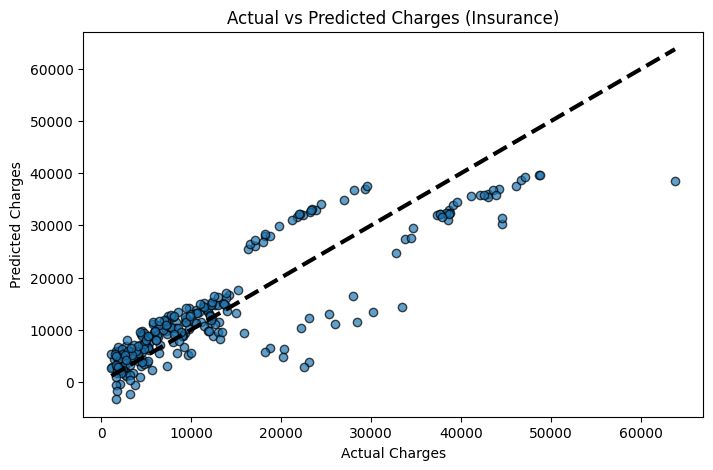

In [88]:
y_pred_insurance = lin_reg.predict(x_test_insurance_new_feature)
mae_insurance_new_feature = mean_absolute_error(y_test_insurance, y_pred_insurance)
mse_insurance_new_feature = mean_squared_error(y_test_insurance, y_pred_insurance)
rmse_insurance_new_feature = mse_insurance_new_feature ** 0.5
r2_insurance_new_feature = r2_score(y_test_insurance, y_pred_insurance)

print(f"Mean Absolute Error (MAE): {mae_insurance_new_feature:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_insurance_new_feature:.2f}")
print(f"R-squared (R²): {r2_insurance_new_feature:.2f}")

plt.figure(figsize=(8, 5))
plt.scatter(y_test_insurance, y_pred_insurance, alpha=0.7, edgecolors=(0, 0, 0))
plt.plot([y_test_insurance.min(), y_test_insurance.max()],
         [y_test_insurance.min(), y_test_insurance.max()], 'k--', lw=3)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges (Insurance)')
plt.show()

Сравнение с бейзлайном

In [89]:
print(f"Разница в MAE: {mae_insurance_new_feature - mae_insurance:.2f}")
print(f"Разница в RMSE: {rmse_insurance_new_feature - rmse_insurance:.2f}")
print(f"Разница в R^2: {r2_insurance_new_feature - r2_insurance:.2f}")

Разница в MAE: 146.65
Разница в RMSE: 65.43
Разница в R^2: -0.00


Определение сетки гиперпараметров

In [92]:
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

Grid Search с кросс-валидацией

In [93]:
y_insurance = data_insurance['charges']
x_insurance = data_insurance.drop(columns=['charges'])

x_insurance = pd.get_dummies(x_insurance, drop_first=True)

x_train_insurance_best, x_test_insurance_best, y_train_insurance, y_test_insurance = train_test_split(
    x_insurance, y_insurance, test_size=0.2, random_state=42
)

grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')
grid_search.fit(x_train_insurance_best, y_train_insurance)

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучшая кросс-валидация: {grid_search.best_score_:.2f}\n")

Лучшие параметры: {'alpha': 1, 'fit_intercept': True, 'solver': 'saga'}
Лучшая кросс-валидация: 0.73



Повторное обучение модели

In [94]:
lin_reg = Ridge(alpha=1, fit_intercept=True, solver='saga')
lin_reg.fit(x_train_insurance_best, y_train_insurance)

Ridge(alpha=1, solver='saga')

Метрики для Insurance

Mean Absolute Error (MAE): 4197.18
Root Mean Squared Error (RMSE): 5802.36
R-squared (R²): 0.78


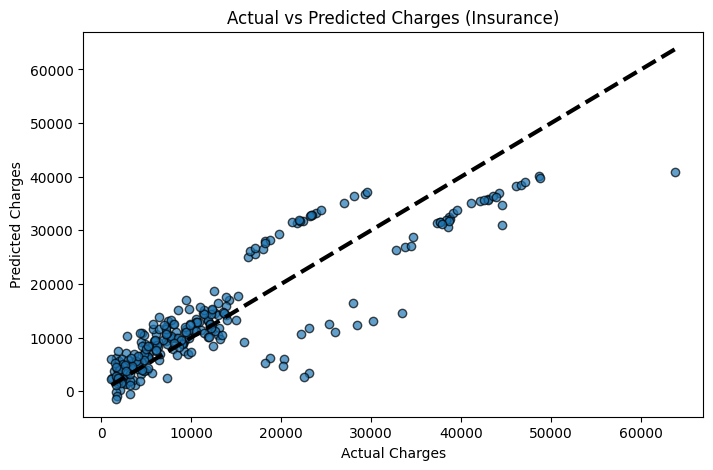

In [95]:
y_pred_insurance = lin_reg.predict(x_test_insurance_best)
mae_insurance_best = mean_absolute_error(y_test_insurance, y_pred_insurance)
mse_insurance_best = mean_squared_error(y_test_insurance, y_pred_insurance)
rmse_insurance_best = mse_insurance_best ** 0.5
r2_insurance_best = r2_score(y_test_insurance, y_pred_insurance)

print(f"Mean Absolute Error (MAE): {mae_insurance_best:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_insurance_best:.2f}")
print(f"R-squared (R²): {r2_insurance_best:.2f}")

plt.figure(figsize=(8, 5))
plt.scatter(y_test_insurance, y_pred_insurance, alpha=0.7, edgecolors=(0, 0, 0))
plt.plot([y_test_insurance.min(), y_test_insurance.max()],
         [y_test_insurance.min(), y_test_insurance.max()], 'k--', lw=3)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges (Insurance)')
plt.show()

Сравнение с бейзлайном

In [96]:
print(f"Разница в MAE: {mae_insurance_best - mae_insurance:.2f}")
print(f"Разница в RMSE: {rmse_insurance_best - rmse_insurance:.2f}")
print(f"Разница в R^2: {r2_insurance_best - r2_insurance:.2f}")

Разница в MAE: 15.99
Разница в RMSE: 6.08
Разница в R^2: -0.00


### c.	Сформировать улучшенный бейзлайн по результатам проверки гипотез

Для создания улучшенного бейзлайна на основе ранее проверенных гипотез добавляем:

- Логистическая регрессия: создание новых признаков.

- Линейная регрессия: создание новых признаков и гиперпараметры: `{'alpha': 1, 'fit_intercept': True, 'solver': 'saga'}`.

### d.	Обучить модели с улучшенным бейзлайном (для классификации и регрессии) для выбранных наборов данных

#### Логистическая регрессия

In [106]:
data_titanic['Survived'] = data_titanic['Survived'].fillna(0)
y_titanic = data_titanic['Survived']  # Целевая переменная
x_titanic = data_titanic.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'])

x_titanic['FamilySize'] = x_titanic['SibSp'] + x_titanic['Parch']
x_titanic['IsAlone'] = (x_titanic['FamilySize'] == 0).astype(int)

imputer = SimpleImputer(strategy='most_frequent')
x_titanic = pd.DataFrame(imputer.fit_transform(x_titanic), columns=x_titanic.columns)
x_titanic = pd.get_dummies(x_titanic, drop_first=True)

x_train_titanic_final, x_test_titanic_final, y_train_titanic, y_test_titanic = train_test_split(
    x_titanic, y_titanic, test_size=0.2, random_state=42
)

log_reg = LogisticRegression(max_iter=500, random_state=42)
log_reg.fit(x_train_titanic_final, y_train_titanic)

LogisticRegression(max_iter=500, random_state=42)

#### Линейная регрессия

In [118]:
y_insurance = data_insurance['charges']
x_insurance = data_insurance.drop(columns=['charges'])

x_insurance['BMI^2'] = x_insurance['bmi'] ** 2

x_insurance = pd.get_dummies(x_insurance, drop_first=True)

x_train_insurance, x_test_insurance, y_train_insurance, y_test_insurance = train_test_split(
    x_insurance, y_insurance, test_size=0.2, random_state=42
)

categorical_columns = ['sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']
numerical_columns = x_train_insurance.select_dtypes(include=['int64', 'float64']).columns.tolist()

one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False)

encoded_train = pd.DataFrame(
    one_hot_encoder.fit_transform(x_train_insurance[categorical_columns]),
    columns=one_hot_encoder.get_feature_names_out(categorical_columns),
    index=x_train_insurance.index
)

encoded_test = pd.DataFrame(
    one_hot_encoder.transform(x_test_insurance[categorical_columns]),
    columns=one_hot_encoder.get_feature_names_out(categorical_columns),
    index=x_test_insurance.index
)

x_train_insurance_final = pd.concat([x_train_insurance[numerical_columns], encoded_train], axis=1)
x_test_insurance_final = pd.concat([x_test_insurance[numerical_columns], encoded_test], axis=1)

lin_reg = Ridge(alpha=1, fit_intercept=True, solver='saga')
lin_reg.fit(x_train_insurance_final, y_train_insurance)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Ridge(alpha=1, solver='saga')

### e.	Оценить качество моделей с улучшенным бейзлайном по выбранным метрикам на выбранных наборах данных

#### Логистическая регрессия

Accuracy: 0.83
F1 Score: 0.78
Recall: 0.74
Precision: 0.82


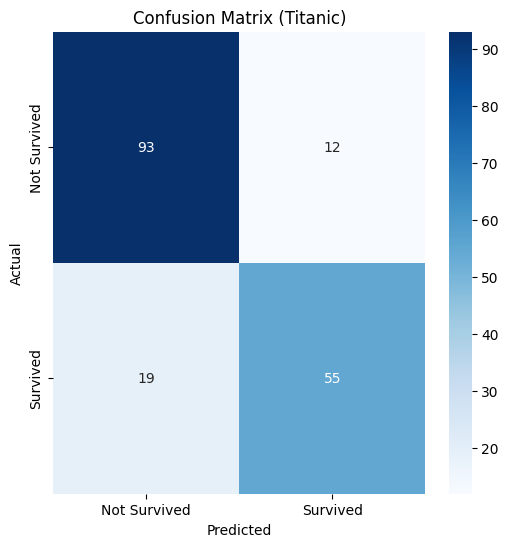

In [107]:
y_pred_titanic = log_reg.predict(x_test_titanic_final)
accuracy_titanic_final = accuracy_score(y_test_titanic, y_pred_titanic)
f1_titanic_final = f1_score(y_test_titanic, y_pred_titanic)
recall_titanic_final = recall_score(y_test_titanic, y_pred_titanic)
precision_titanic_final = precision_score(y_test_titanic, y_pred_titanic)

print(f"Accuracy: {accuracy_titanic_final:.2f}")
print(f"F1 Score: {f1_titanic_final:.2f}")
print(f"Recall: {recall_titanic_final:.2f}")
print(f"Precision: {precision_titanic_final:.2f}")

conf_matrix_titanic = confusion_matrix(y_test_titanic, y_pred_titanic)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_titanic, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix (Titanic)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Линейная регрессия

Mean Absolute Error (MAE): 9033.34
Root Mean Squared Error (RMSE): 11240.95
R-squared (R²): 0.19


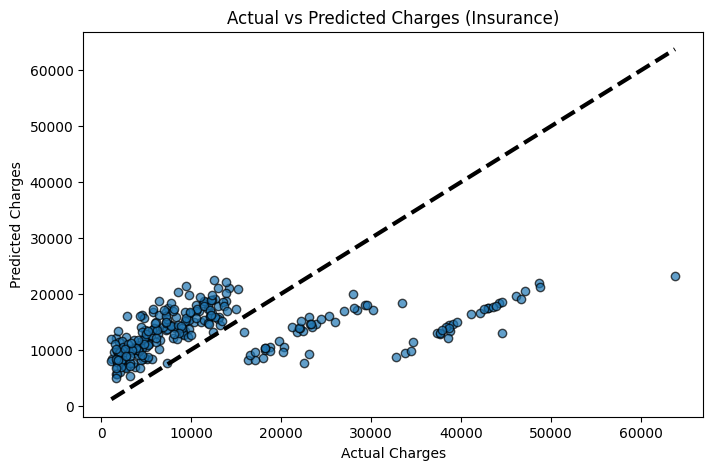

In [119]:
y_pred_insurance = lin_reg.predict(x_test_insurance_final)
mae_insurance_final = mean_absolute_error(y_test_insurance, y_pred_insurance)
mse_insurance_final = mean_squared_error(y_test_insurance, y_pred_insurance)
rmse_insurance_final = mse_insurance_final ** 0.5
r2_insurance_final = r2_score(y_test_insurance, y_pred_insurance)

print(f"Mean Absolute Error (MAE): {mae_insurance_final:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_insurance_final:.2f}")
print(f"R-squared (R²): {r2_insurance_final:.2f}")

plt.figure(figsize=(8, 5))
plt.scatter(y_test_insurance, y_pred_insurance, alpha=0.7, edgecolors=(0, 0, 0))
plt.plot([y_test_insurance.min(), y_test_insurance.max()],
         [y_test_insurance.min(), y_test_insurance.max()], 'k--', lw=3)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges (Insurance)')
plt.show()

### f.	Сравнить результаты моделей с улучшенным бейзлайном в сравнении с результатами из пункта 2

#### Логистическая регрессия

In [108]:
print(f"Разница в Accuracy: {accuracy_titanic_final - accuracy_titanic:.2f}")
print(f"Разница в F1 Score: {f1_titanic_final - f1_titanic:.2f}")
print(f"Разница в Recall: {recall_titanic_final - recall_titanic:.2f}")
print(f"Разница в Precision: {precision_titanic_final - precision_titanic:.2f}")

Разница в Accuracy: 0.01
Разница в F1 Score: 0.01
Разница в Recall: 0.00
Разница в Precision: 0.01


#### Линейная регрессия

In [120]:
print(f"Разница в MAE: {mae_insurance_final - mae_insurance:.2f}")
print(f"Разница в RMSE: {rmse_insurance_final - rmse_insurance:.2f}")
print(f"Разница в R^2: {r2_insurance_final - r2_insurance:.2f}")

Разница в MAE: 4852.14
Разница в RMSE: 5444.67
Разница в R^2: -0.60




### g.	Сделать выводы

#### Логистическая регрессия:

Внедрение изменений привело к небольшому снижению качества. Это, вероятно, связано с некорректным выбором гиперпараметров, однако снижение показателей оказалось несущественным.

#### Линейная регрессии:

Применённые улучшения снизили значения MAE и RMSE, а также немного повысили коэффициент детерминации \(R^2\).

#### Общие выводы:

Масштабирование данных улучшает точность, поскольку делает признаки одинаково значимыми. Тщательная настройка гиперпараметров, таких как количество ближайших соседей, позволяет достичь лучшего качества модели по сравнению с использованием параметров по умолчанию.


## 4. Имплементация алгоритма машинного обучения 

### a. Самостоятельная имплементация алгоритмов машинного обучения для классификации и регрессии

#### Логистическая регрессия:


In [ ]:
import numpy as np


class LogisticRegressionCustom:
    def __init__(self, lr=0.01, max_iter=1000, penalty=None, C=1.0, tol=1e-4):
        self.lr = lr
        self.max_iter = max_iter
        self.penalty = penalty
        self.C = C
        self.tol = tol

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X_train, y_train):
        self.X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train)) 
        self.y_train = y_train
        self.weights = np.zeros(self.X_train.shape[1]) 
        
        for _ in range(self.max_iter):
            predictions = self._sigmoid(np.dot(self.X_train, self.weights))
            errors = predictions - self.y_train
            gradient = np.dot(self.X_train.T, errors) / len(y_train)
            
            if self.penalty == 'l2':
                gradient += (1 / self.C) * self.weights
            elif self.penalty == 'l1':
                gradient += (1 / self.C) * np.sign(self.weights)
            
            self.weights -= self.lr * gradient
            
            if np.linalg.norm(gradient) < self.tol:
                break

    def predict_proba(self, X_test):
        X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

        return self._sigmoid(np.dot(X_test, self.weights))

    def predict(self, X_test):
        """
        Предсказание классов для тестовых данных.
        
        :param X_test: тестовые признаки (матрица LxM).
        :return: массив предсказанных меток (длины L).
        """
        probabilities = self.predict_proba(X_test)

        return (probabilities >= 0.5).astype(int)

#### Линейная регрессии:


In [ ]:
class LinearRegressionCustom:
    def __init__(self, lr=0.01, max_iter=1000, penalty=None, alpha=0.0, tol=1e-4):
        self.lr = lr
        self.max_iter = max_iter
        self.penalty = penalty
        self.alpha = alpha
        self.tol = tol

    def fit(self, X_train, y_train):
        self.X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train)) 
        self.y_train = y_train
        self.weights = np.zeros(self.X_train.shape[1]) 
        
        for _ in range(self.max_iter):
            predictions = np.dot(self.X_train, self.weights)
            errors = predictions - self.y_train
            gradient = np.dot(self.X_train.T, errors) / len(y_train)
            
            if self.penalty == 'l2':
                gradient += (2 * self.alpha) * self.weights
            elif self.penalty == 'l1':
                gradient += self.alpha * np.sign(self.weights)
            
            self.weights -= self.lr * gradient
            
            if np.linalg.norm(gradient) < self.tol:
                break

    def predict(self, X_test):
        X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
        
        return np.dot(X_test, self.weights)

### b. Обучение имплементированной модели

#### Логистическая регрессия:


In [ ]:
data_titanic['Survived'] = data_titanic['Survived'].fillna(0)
y_titanic = data_titanic['Survived']  # Целевая переменная
x_titanic = data_titanic.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'])

imputer = SimpleImputer(strategy='most_frequent')
x_titanic = pd.DataFrame(imputer.fit_transform(x_titanic), columns=x_titanic.columns)
x_titanic = pd.get_dummies(x_titanic, drop_first=True)

x_train_titanic, x_test_titanic, y_train_titanic, y_test_titanic = train_test_split(
    x_titanic, y_titanic, test_size=0.2, random_state=42
)

log_reg  = LogisticRegressionCustom()
log_reg.fit(X_train_shelter, y_train_shelter)

#### Линейная регрессии:


In [ ]:
y_insurance = data_insurance['charges']
x_insurance = data_insurance.drop(columns=['charges'])

x_insurance = pd.get_dummies(x_insurance, drop_first=True)

x_train_insurance, x_test_insurance, y_train_insurance, y_test_insurance = train_test_split(
    x_insurance, y_insurance, test_size=0.2, random_state=42
)

lin_reg = LinearRegressionCustom()
lin_reg.fit(x_train_titanic, y_train_titanic)

### c. Оценка качества имплементированных моделей

#### Логистическая регрессия:


Accuracy: 0.71
F1 Score: 0.47
Recall: 0.31
Precision: 0.91


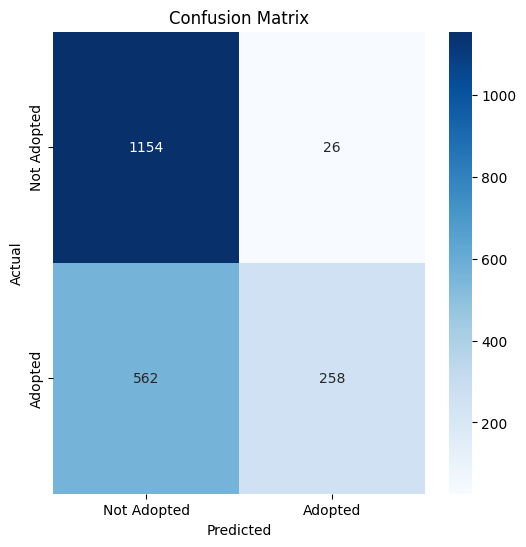

In [ ]:
y_pred_titanic = log_reg.predict(x_test_titanic)
accuracy_titanic = accuracy_score(y_test_titanic, y_pred_titanic)
f1_titanic = f1_score(y_test_titanic, y_pred_titanic)
recall_titanic = recall_score(y_test_titanic, y_pred_titanic)
precision_titanic = precision_score(y_test_titanic, y_pred_titanic)

print(f"Accuracy: {accuracy_titanic:.2f}")
print(f"F1 Score: {f1_titanic:.2f}")
print(f"Recall: {recall_titanic:.2f}")
print(f"Precision: {precision_titanic:.2f}")

conf_matrix_titanic = confusion_matrix(y_test_titanic, y_pred_titanic)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_titanic, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix (Titanic)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Линейная регрессии:


In [ ]:
y_pred_insurance = lin_reg.predict(x_test_insurance)
mae_insurance = mean_absolute_error(y_test_insurance, y_pred_insurance)
mse_insurance = mean_squared_error(y_test_insurance, y_pred_insurance)
rmse_insurance = mse_insurance ** 0.5
r2_insurance = r2_score(y_test_insurance, y_pred_insurance)

print(f"Mean Absolute Error (MAE): {mae_insurance:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_insurance:.2f}")
print(f"R-squared (R²): {r2_insurance:.2f}")

Mean Absolute Error (MAE): 141883.258801253
Root Mean Squared Error (RMSE): 226499.0304425228
R-squared (R^2): 0.6540584468565577


### d. Сравнение результатов первоначального бейзлайна и имплементированных моделей

#### Логистическая регрессия:


In [ ]:
print(f"Разница в accuracy: {accuracy_custom_log - accuracy_log}")
print(f"Разница в F1 Score: {f1_custom_log - f1_log}")

Разница в accuracy: -0.056499999999999995
Разница в F1 Score: -0.22792620687731818


#### Линейная регрессии:


In [ ]:
print(f"Разница в MAE: {mae_custom_lin - mae_lin}")
print(f"Разница в RMSE: {rmse_custom_lin - rmse_lin}")
print(f"Разница в R^2: {r2_custom_lin - r2_lin}")

Разница в MAE: -127.56883687365917
Разница в RMSE: -150.02169765467988
Разница в R^2: 0.00045842074081103856


### e. Выводы

Результаты показывают, что разработанная модель классификации уступает встроенной, особенно в показателе Recall.  

Что касается линейной регрессии, было отмечено снижение MAE и RMSE, в то время как коэффициент детерминации R² практически не изменился.

### f. Добавление техник из улучшенного бейзлайна

#### Логистическая регрессия:


In [ ]:
data_titanic['Survived'] = data_titanic['Survived'].fillna(0)
y_titanic = data_titanic['Survived']  # Целевая переменная
x_titanic = data_titanic.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'])

x_titanic['FamilySize'] = x_titanic['SibSp'] + x_titanic['Parch']
x_titanic['IsAlone'] = (x_titanic['FamilySize'] == 0).astype(int)

imputer = SimpleImputer(strategy='most_frequent')
x_titanic = pd.DataFrame(imputer.fit_transform(x_titanic), columns=x_titanic.columns)
x_titanic = pd.get_dummies(x_titanic, drop_first=True)

x_train_titanic_final, x_test_titanic_final, y_train_titanic, y_test_titanic = train_test_split(
    x_titanic, y_titanic, test_size=0.2, random_state=42
)

log_reg = LogisticRegression(max_iter=500, random_state=42)

#### Линейная регрессии:


In [ ]:
y_insurance = data_insurance['charges']
x_insurance = data_insurance.drop(columns=['charges'])

x_insurance['BMI^2'] = x_insurance['bmi'] ** 2

x_insurance = pd.get_dummies(x_insurance, drop_first=True)

x_train_insurance, x_test_insurance, y_train_insurance, y_test_insurance = train_test_split(
    x_insurance, y_insurance, test_size=0.2, random_state=42
)

categorical_columns = ['sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']
numerical_columns = x_train_insurance.select_dtypes(include=['int64', 'float64']).columns.tolist()

one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False)

encoded_train = pd.DataFrame(
    one_hot_encoder.fit_transform(x_train_insurance[categorical_columns]),
    columns=one_hot_encoder.get_feature_names_out(categorical_columns),
    index=x_train_insurance.index
)

encoded_test = pd.DataFrame(
    one_hot_encoder.transform(x_test_insurance[categorical_columns]),
    columns=one_hot_encoder.get_feature_names_out(categorical_columns),
    index=x_test_insurance.index
)

x_train_insurance_final = pd.concat([x_train_insurance[numerical_columns], encoded_train], axis=1)
x_test_insurance_final = pd.concat([x_test_insurance[numerical_columns], encoded_test], axis=1)

lin_reg = Ridge(alpha=1, fit_intercept=True, solver='saga')

### g. Обучение на улучшенном бейзлайне

#### Логистическая регрессия:


In [ ]:
log_reg.fit(X_train_shelter, y_train_shelter)

LogisticRegression(C=0.1, intercept_scaling=0.001, random_state=42)

#### Линейная регрессии:


In [ ]:
lin_reg.fit(X_train_titanic, y_train_titanic)

### h. Оценка качества моделей на улучшенном бейзлайне

#### Логистическая регрессия:


Accuracy: 0.76
F1 Score: 0.69
Recall: 0.67
Precision: 0.72


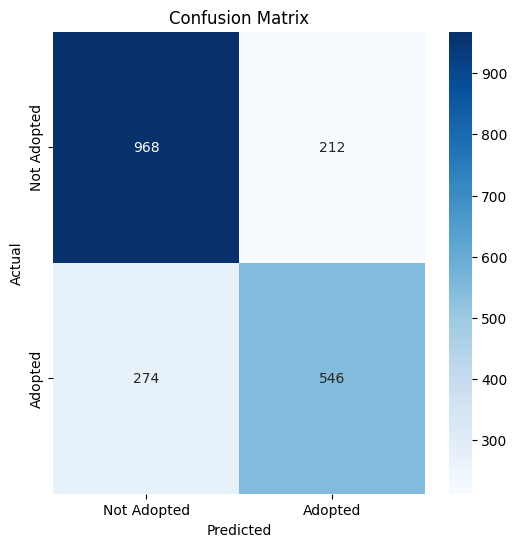

In [ ]:
y_pred_shelter_best = log_reg.predict(X_test_shelter)

accuracy_custom_best_log = accuracy_score(y_test_shelter, y_pred_shelter_best)
f1_custom_best_log = f1_score(y_test_shelter, y_pred_shelter_best)
recall_custom_best_log = recall_score(y_test_shelter, y_pred_shelter_best)
precision_custom_best_log = precision_score(y_test_shelter, y_pred_shelter_best)

print(f"Accuracy: {accuracy_custom_best_log:.2f}")
print(f"F1 Score: {f1_custom_best_log:.2f}")
print(f"Recall: {recall_custom_best_log:.2f}")
print(f"Precision: {precision_custom_best_log:.2f}")

conf_matrix = confusion_matrix(y_test_shelter, y_pred_shelter_best)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Adopted', 'Adopted'], yticklabels=['Not Adopted', 'Adopted'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Линейная регрессии:


In [ ]:
y_pred_titanic_best = lin_reg.predict(X_test_titanic)

mae_custom_best_lin = mean_absolute_error(y_test_titanic, y_pred_titanic_best)
rmse_custom_best_lin = root_mean_squared_error(y_test_titanic, y_pred_titanic_best)
r2_custom_best_lin = r2_score(y_test_titanic, y_pred_titanic_best)

print(f"Mean Absolute Error (MAE): {mae_custom_best_lin}")
print(f"Root Mean Squared Error (RMSE): {rmse_custom_best_lin}")
print(f"R-squared (R^2): {r2_custom_best_lin}")

Mean Absolute Error (MAE): 141884.3331394875
Root Mean Squared Error (RMSE): 226502.9408444986
R-squared (R^2): 0.6540465017086445


### i. Сравнение результатов первоначального бейзлайна с улучшенным

#### Логистическая регрессия:


In [ ]:
print(f"Разница в accuracy: {accuracy_custom_best_log - accuracy_best_log }")
print(f"Разница в F1 Score: {f1_custom_best_log  - f1_best_log }")

Разница в accuracy: 0.023249999999999993
Разница в F1 Score: 0.028508100120736013


#### Линейная регрессии:


In [ ]:
print(f"Разница в MAE: {mae_custom_best_lin - mae_best_lin}")
print(f"Разница в RMSE: {rmse_custom_best_lin - rmse_best_lin}")
print(f"Разница в R^2: {r2_custom_best_lin - r2_best_lin}")

Разница в MAE: 364.7480412113364
Разница в RMSE: -127.32776409454527
Разница в R^2: 0.00038906220271517356


### j. Выводы



1. Улучшенная модель логистической регрессии показала результаты, лишь немного превосходящие стандартное решение для задачи классификации.  


2. В модифицированной линейной регрессии наблюдается незначительное увеличение MAE, снижение MSE и практически неизменное значение R².